In [217]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import confusion_matrix

%matplotlib inline 

In [329]:
x = pd.read_csv('train_features.csv', header = None)
y = pd.read_csv('train_labels.csv', header = None)

test_x = pd.read_csv('test_features.csv', header = None)

In [219]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,893,894,895,896,897,898,899,900,901,902
0,right,type_3,green,0.8827,3.2917,1.4651,-4.5278,1.0490,2.3398,1.8729,...,0.8854,-0.8752,0.2662,4.9686,2.5588,-0.6121,-3.3692,0.0550,-1.5296,-5.3041
1,left,type_2,blue,1.4458,-2.9575,-1.2341,-3.9684,-2.7645,5.6346,1.7838,...,-4.3774,-2.2512,-1.6331,7.2724,1.7616,4.2826,5.5557,1.0588,2.6734,-4.5224
2,right,type_2,green,-10.2982,-0.3714,-0.9886,-3.2219,4.0925,-0.8319,-3.0588,...,-1.4408,-2.5580,-1.2116,5.1098,-0.6747,-1.2528,-2.2944,-3.4745,2.8633,1.6737
3,right,type_1,red,-8.4566,-0.2408,-3.0342,2.9534,2.8977,0.8851,3.0113,...,0.9434,-0.8771,0.4143,4.3368,-11.2949,-7.4289,7.9900,-6.2433,1.6592,-4.8601
4,left,type_1,blue,4.2681,-2.2052,-5.9093,0.1036,1.8462,1.9801,2.1129,...,-0.2290,0.5390,0.7648,1.1348,1.9829,3.7682,-1.7092,1.4791,5.7732,-3.9106


In [220]:
x.describe()

,3,4,5,6,7,8,9,10,11,12,...,893,894,895,896,897,898,899,900,901,902
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,-3.706226,0.620541,-0.691226,-2.883438,0.798445,0.276561,0.382528,-0.890959,-1.694734,-0.719966,...,-1.508409,-1.576743,0.190566,0.665053,-0.774684,0.931779,0.791181,-0.458641,0.723416,-0.132218
std,4.064704,3.014747,3.295262,3.331956,3.484214,3.203680,3.114446,3.221021,3.639898,3.124935,...,3.125331,3.262723,3.429600,3.092077,3.462897,3.301253,3.131848,2.616963,3.382829,3.657816
min,-12.753200,-8.020900,-9.688800,-10.540100,-8.493400,-6.525400,-8.397000,-8.372300,-10.153200,-10.185400,...,-8.152700,-10.229800,-8.713400,-9.106600,-11.294900,-7.695700,-7.090500,-6.851600,-6.184400,-9.723500
25%,-6.393700,-1.665500,-2.625975,-5.215000,-1.934025,-1.833875,-1.871550,-2.941725,-3.986725,-2.876275,...,-3.739425,-3.837325,-2.248525,-1.361275,-3.141325,-0.960575,-1.299400,-2.491375,-1.769575,-2.728575
50%,-4.022400,0.559550,-0.651150,-3.022050,1.005600,0.309250,0.454450,-0.826550,-1.664150,-0.940650,...,-1.873850,-1.594600,0.274000,0.456750,-1.232550,1.210100,0.785650,-0.055900,0.350250,0.200050
75%,-0.860025,2.784550,1.432475,-0.441100,3.353100,2.432525,2.270475,1.324300,0.575900,1.441625,...,0.490925,0.554300,2.449825,2.790450,1.842575,3.121575,2.618375,1.136900,3.384000,2.175950
max,7.862500,9.077900,7.729800,5.230100,10.856000,8.125200,9.032900,8.249100,7.994100,7.576900,...,7.073000,6.822000,11.433600,9.259000,7.385900,12.639000,9.713000,5.019900,8.439900,9.632300


In [221]:
print('x shape: {}'.format(x.shape))
print('y shape: {}'.format(y.shape))

x shape: (140, 903)
y shape: (140, 1)


In [222]:
# check missing values
x.isnull().sum().sum()

0

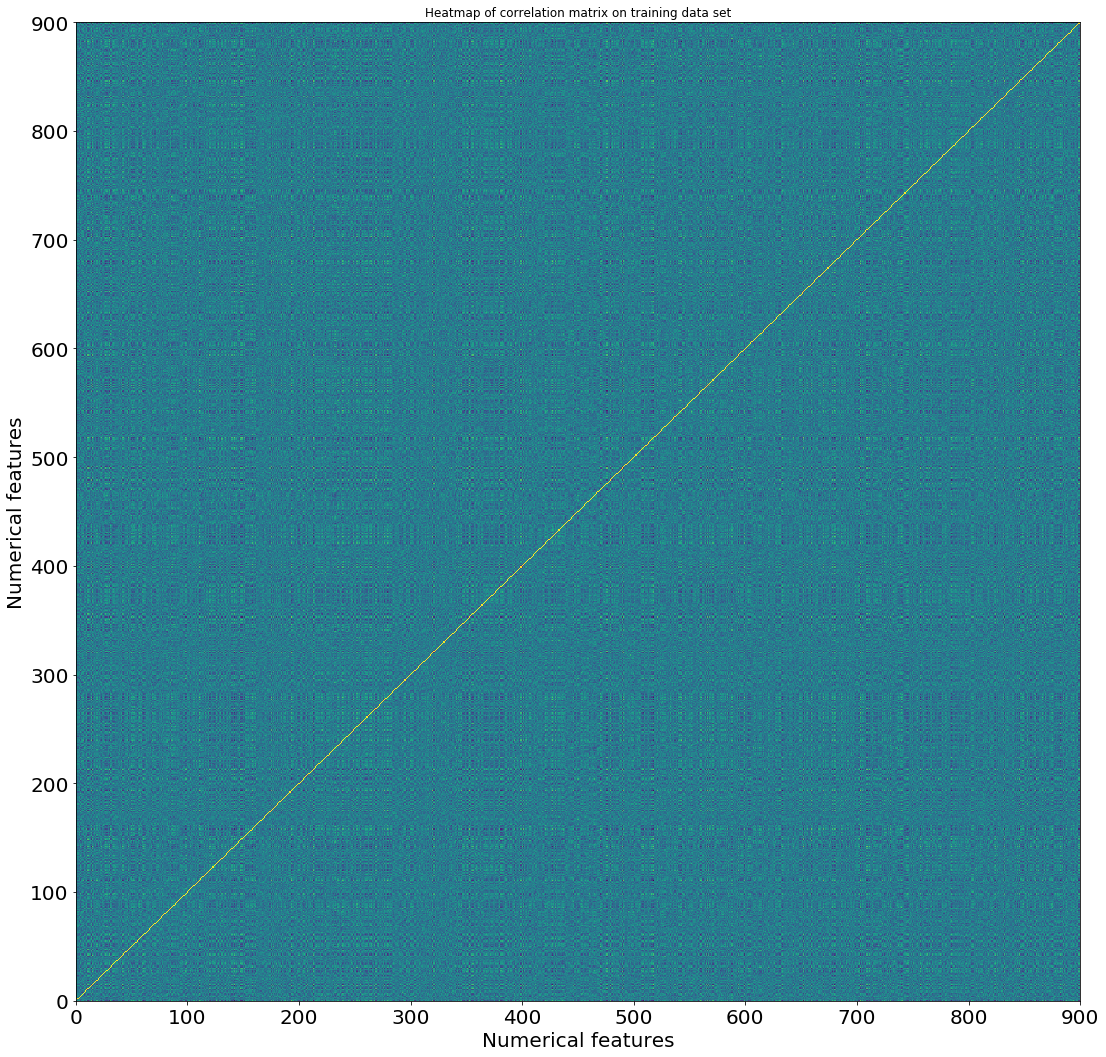

In [125]:
# check for multicolinearity using correlation matrix

fig, ((ax1)) = plt.subplots(1, 1, figsize=(18,18))
corr_train = x.loc[:,3:].corr()
ax1.pcolor(corr_train)
# ax1.set_xlim([0,36])
# ax1.set_ylim([0,36])
ax1.set_xlabel('Numerical features', size='20')
ax1.set_ylabel('Numerical features', size='20')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_title('Heatmap of correlation matrix on training data set')
plt.show()

## Data looks like images.. let's check

In [223]:
# Extract the numerical columns
x_num = x.loc[:,3:]

In [224]:
# Look at some rows that have consistant attributes in column 0 (e.g. 'right') 
# and column 1 (e.g. 'type_1') and have the same class (e.g. y = 1)

x[(x.loc[:,0] == 'right') & (x.loc[:,1] == 'type_1') & (y.loc[:,0] == 1)]

,0,1,2,3,4,5,6,7,8,9,...,893,894,895,896,897,898,899,900,901,902
7,right,type_1,blue,3.4129,6.3739,0.8571,1.8143,0.6068,-5.1371,2.2353,...,-2.0691,0.9680,1.3313,-0.4414,1.8313,-0.8873,0.0586,0.1866,3.8324,3.0546
11,right,type_1,green,-3.3171,3.5365,-1.6368,-0.2122,3.7464,-0.7287,-2.2355,...,4.2791,3.7688,1.2475,1.8764,-1.6373,-1.4604,-4.6822,5.0199,0.5436,1.0001
26,right,type_1,red,-5.6612,-0.3043,-2.1388,-9.2406,2.1754,7.2458,-3.2094,...,3.1774,-0.9540,0.7152,-2.6724,3.1231,0.9546,-1.5530,-5.8805,-0.7908,1.1848
45,right,type_1,green,-4.1174,3.8015,-5.1034,-5.0286,0.6876,-5.1919,2.9001,...,-0.8694,2.9518,5.8392,5.7914,-4.4936,2.1742,-1.2086,0.7753,2.0320,-1.5264
77,right,type_1,blue,4.7543,-0.7172,2.2829,-0.6639,-1.3428,0.0874,5.9826,...,-2.6553,0.2289,-0.1235,3.1523,6.7853,1.8967,3.0920,1.1094,-0.5815,-5.7725
80,right,type_1,red,5.4860,3.1503,-1.4295,2.6910,-2.6082,2.4294,0.4485,...,0.4735,-1.8400,1.2697,1.4163,3.9706,7.2977,-1.2946,1.5267,6.9790,-4.5504
83,right,type_1,green,-7.9733,-3.4397,1.6120,-1.5285,0.5128,-2.9411,1.5741,...,1.2490,2.6726,-5.2425,1.1510,-1.3976,-5.2282,3.7967,-0.9389,5.7090,3.8977
84,right,type_1,red,-0.8535,-5.1511,-5.9026,-2.8046,4.5433,1.4544,2.0097,...,-2.3282,-1.3889,1.0500,0.4506,-4.7603,-2.2400,-1.2532,-2.9276,-1.2106,-0.5052
103,right,type_1,green,-12.7532,4.3152,3.9129,-3.5041,0.6345,-1.8060,-0.6103,...,-1.6853,-0.4505,2.3644,-1.1359,-1.5094,-3.8817,-2.9138,-1.5974,0.9118,1.5762
107,right,type_1,green,-9.2979,-5.5987,-1.3266,1.6367,2.9573,0.0394,-4.7554,...,-2.2637,-2.5193,-0.9960,-3.1686,-2.5700,1.9910,1.3138,-5.3799,0.1213,2.6647


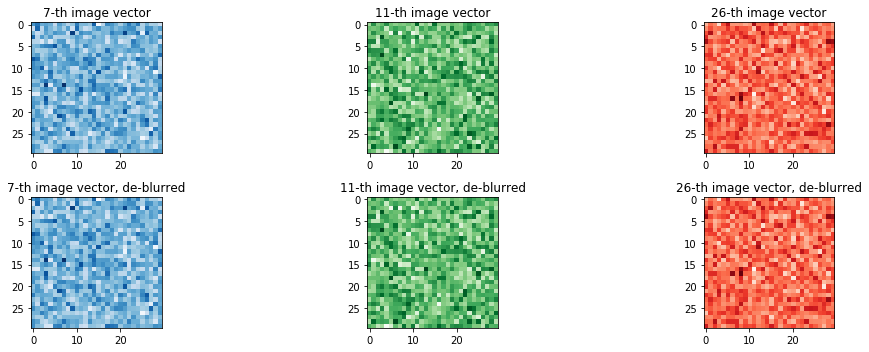

In [225]:
# Plot a couple of images from the dataset. 
# Here 7, 11, 26 represent blue, green and red, so let's choose these

fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(x_num.loc[7,:].values.reshape(30, 30), cmap=plt.cm.Blues)
ax[0, 0].set_title('7-th image vector')
ax[0, 1].imshow(x_num.loc[11,:].values.reshape(30, 30), cmap=plt.cm.Greens)
ax[0, 1].set_title('11-th image vector')
ax[0, 2].imshow(x_num.loc[26,:].values.reshape(30, 30), cmap=plt.cm.Reds)
ax[0, 2].set_title('26-th image vector')

ax[1, 0].imshow(x_num.loc[7,:].values.reshape(30, 30), cmap=plt.cm.Blues, interpolation='nearest')
ax[1, 0].set_title('7-th image vector, de-blurred')
ax[1, 1].imshow(x_num.loc[11,:].values.reshape(30, 30), cmap=plt.cm.Greens, interpolation='nearest')
ax[1, 1].set_title('11-th image vector, de-blurred')
ax[1, 2].imshow(x_num.loc[26,:].values.reshape(30, 30), cmap=plt.cm.Reds, interpolation='nearest')
ax[1, 2].set_title('26-th image vector, de-blurred')

plt.tight_layout()
plt.show()

It seems like there is no obvious pattern. It also looks like some kind of (non-linear?) transformation has been performed on the numerical columns because there are negative values.

### Create dummy variables for categorical columns

In [226]:
x_dummy = pd.concat([pd.get_dummies(x[[0,1,2]]), x.loc[:, 3:]], axis = 1)
print('x with dummy variables:', x_dummy.shape)
x_dummy.head()

x with dummy variables: (140, 908)


,0_left,0_right,1_type_1,1_type_2,1_type_3,2_blue,2_green,2_red,3,4,...,893,894,895,896,897,898,899,900,901,902
0,0,1,0,0,1,0,1,0,0.8827,3.2917,...,0.8854,-0.8752,0.2662,4.9686,2.5588,-0.6121,-3.3692,0.0550,-1.5296,-5.3041
1,1,0,0,1,0,1,0,0,1.4458,-2.9575,...,-4.3774,-2.2512,-1.6331,7.2724,1.7616,4.2826,5.5557,1.0588,2.6734,-4.5224
2,0,1,0,1,0,0,1,0,-10.2982,-0.3714,...,-1.4408,-2.5580,-1.2116,5.1098,-0.6747,-1.2528,-2.2944,-3.4745,2.8633,1.6737
3,0,1,1,0,0,0,0,1,-8.4566,-0.2408,...,0.9434,-0.8771,0.4143,4.3368,-11.2949,-7.4289,7.9900,-6.2433,1.6592,-4.8601
4,1,0,1,0,0,1,0,0,4.2681,-2.2052,...,-0.2290,0.5390,0.7648,1.1348,1.9829,3.7682,-1.7092,1.4791,5.7732,-3.9106


In [227]:
print('x with dummy variables shape: {}'.format(x_dummy.shape))

x with dummy variables shape: (140, 908)


## Logistic Regression with CV

#### Train / Test split: `x_train`, `x_test`, `y_train`, `y_test`

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.3, random_state = 42)

In [230]:
model = LogisticRegressionCV(cv = 10, solver = 'lbfgs', 
                             class_weight= 'balanced', 
                             penalty = 'l2',
                             multi_class='multinomial')
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_test)
acc = round(sum(y_test.values.ravel() == pred) / y_test.shape[0], 4)
print('Accuracy of logistic regression cv = 5 model: {}'.format(acc))

Accuracy of logistic regression cv = 5 model: 0.7381


In [231]:
confusion_matrix(y_test, pred)

array([[ 0,  3,  1],
       [ 0, 25,  1],
       [ 0,  6,  6]])

## PCA on the numerical columns

In [232]:
y_ = y.values.ravel()

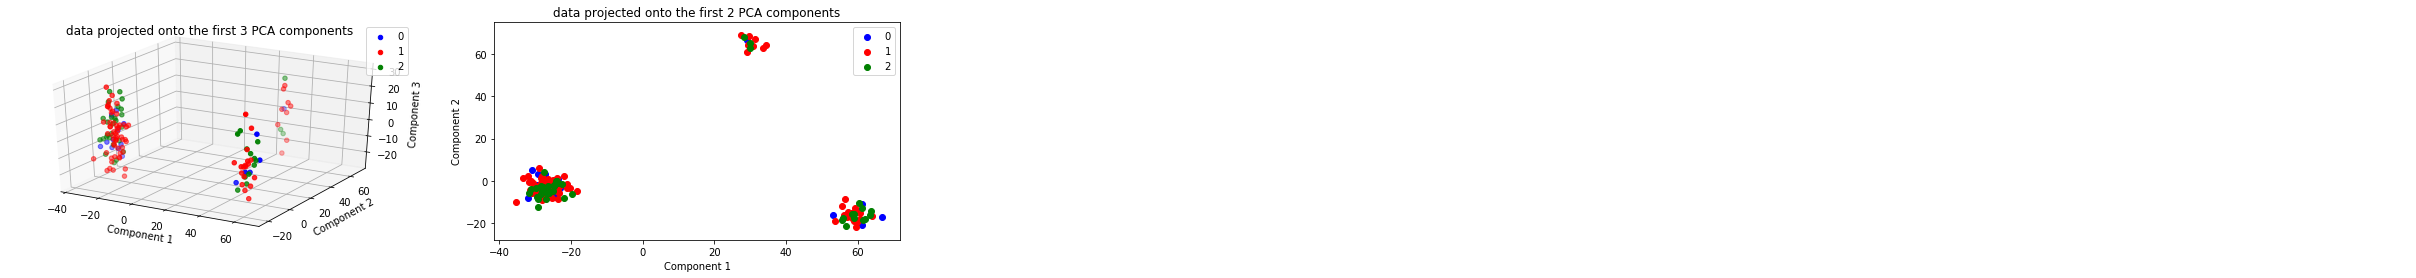

In [233]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x_num)

#Project to the data onto the three axes
# x_reduced = pca.transform(x_dummy)
x_reduced = pca.transform(x_num)

#Visualized our reduced data
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y_==0, 0], x_reduced[y_==0, 1], x_reduced[y_==0, 2], c='b', label='0')
ax1.scatter(x_reduced[y_==1, 0], x_reduced[y_==1, 1], x_reduced[y_==1, 2], c='r', label='1')
ax1.scatter(x_reduced[y_==2, 0], x_reduced[y_==2, 1], x_reduced[y_==2, 2], c='g', label='2')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x_dummy)

#Project to the data onto the three axes
x_reduced = pca.transform(x_dummy)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y_==0, 0], x_reduced[y_==0, 1], c='b', label='0')
ax2.scatter(x_reduced[y_==1, 0], x_reduced[y_==1, 1], c='r', label='1')
ax2.scatter(x_reduced[y_==2, 0], x_reduced[y_==2, 1], c='g', label='2')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.show()

In [153]:
components = np.array([2, 3, 5, 10, 15, 20])
acc_pca = np.zeros(components.shape[0])
for i in range(components.shape[0]):
    n = components[i]
    pca = PCA(n_components=n)
    pca.fit(x_num)
    x_reduced = pca.transform(x_num)
    
    x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size = 0.3, random_state = 42)
    
    model = LogisticRegressionCV(cv = 10, solver = 'lbfgs', 
                             class_weight= 'balanced', 
                             penalty = 'l2',
                             multi_class='multinomial')
    model.fit(x_train, y_train.values.ravel())
    pred = model.predict(x_test)
    acc_pca[i] = round(sum(y_test.values.ravel() == pred) / y_test.shape[0], 4)
#     print('Accuracy of logistic regression cv = 5 model: {}'.format(acc))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

In [234]:
acc_pca

array([0.381 , 0.381 , 0.619 , 0.7619, 0.6429, 0.6429])

## CNN
Following example at: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [235]:
from keras.datasets import mnist

In [236]:
#reshape data to fit model
x_reshape = np.array(x_num).reshape(140,30,30,1)

In [237]:
# one-hot encoding of the dependent variable
from keras.utils import to_categorical
y_onehot = to_categorical(y)

In [201]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(30,30,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [202]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [203]:
#train the model
model.fit(x_reshape[:100], y_onehot[:100], validation_data=(x_reshape[100:], y_onehot[100:]), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 40 samples
Epoch 1/3
100/100 [==============================] - 1s 11ms/step - loss: 1.6015 - acc: 0.4400 - val_loss: 1.0484 - val_acc: 0.6500
Epoch 2/3
100/100 [==============================] - 1s 5ms/step - loss: 0.7839 - acc: 0.6600 - val_loss: 0.9363 - val_acc: 0.5750
Epoch 3/3
100/100 [==============================] - 1s 6ms/step - loss: 0.6038 - acc: 0.6700 - val_loss: 0.8742 - val_acc: 0.5750


In [216]:
#predict first 10 images in the test set
pred_cnn = model.predict(x_reshape[100:110])
pred_cnn

array([[0.18726572, 0.59406203, 0.21867226],
       [0.13805924, 0.5277839 , 0.33415693],
       [0.1908814 , 0.5484445 , 0.2606741 ],
       [0.16286533, 0.5611251 , 0.2760096 ],
       [0.18847573, 0.5330792 , 0.27844507],
       [0.15482423, 0.5381195 , 0.30705622],
       [0.11112573, 0.55970776, 0.3291665 ],
       [0.15875489, 0.58073103, 0.2605141 ],
       [0.13038868, 0.6003914 , 0.26921985],
       [0.08000137, 0.6175157 , 0.30248293]], dtype=float32)

In [211]:
#actual results for first 4 images in test set
y_onehot[100:110]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## Random Forest

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [377]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.33, random_state = 42)

In [378]:
clf = RandomForestClassifier(n_estimators=200, max_depth=5, max_features = 50, random_state=0)
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [379]:
clf.feature_importances_[:20]

array([0.        , 0.        , 0.00017154, 0.00233439, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00151046,
       0.00203097, 0.        , 0.00115363, 0.00453631, 0.00060641,
       0.00018112, 0.00089845, 0.        , 0.00056928, 0.00061815])

In [380]:
clf.predict(x_test)

array([2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1])

In [381]:
clf.score(x_test, y_test)

0.7872340425531915

In [382]:
confusion_matrix(y_test, clf.predict(x_test))

array([[ 0,  4,  1],
       [ 0, 28,  1],
       [ 0,  4,  9]])